# **Servo Prediction using Linear Regression**





# **Get Understanding about Data set**

**What is Servo :** In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

Motor A,B,C,D,E

Screw A,B,C,D,E

Pgain 3,4,5,6

Vgain 1,2,3,4,5

Class 0.13 to 7.10

# **Import Library**

In [197]:
import pandas as pd
import numpy as np

# **Import CSV as Dataframe**

In [221]:
servo = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')


# **Get the first 5 rows in Dataframe**

In [222]:
servo.head()


,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# **Get Information of Dataframe**

In [223]:
servo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# **Get the Summary Statistics**

In [224]:
servo.describe()


,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# **Get Column Names**

In [227]:
servo.columns


Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# **Get Shape of Dataframe**

In [228]:


servo.shape


(167, 5)

# **Get Categories and Counts of Categorical Variables**

In [229]:


servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [230]:


servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [231]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


# **Define Target variable (y) and Feature Variables(x)**

In [232]:


#Define Target variable (y) and Feature Variables(x)
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [233]:


y = servo['Class']
x = servo[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [234]:


x.shape, y.shape

((167, 4), (167,))

# **Train Test Split**

In [235]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 ,random_state=2529)



In [236]:
x_train

,Motor,Screw,Pgain,Vgain
76,4,2,4,1
159,0,0,5,4
157,0,1,3,1
120,1,1,4,1
10,1,4,6,5
...,...,...,...,...
72,2,1,5,4
143,0,1,4,2
60,4,1,4,2
50,3,0,6,5


In [237]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((116, 4), (51, 4), (116,), (51,))

# **Modeling**

In [238]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()


# **Model Evaluation**

In [239]:
model.fit(x_train,y_train)

LinearRegression()

In [240]:
model.intercept_


79.29807295805837

In [241]:
model.coef_

array([ -2.04322378,  -2.98953597, -14.59161593,   4.5836332 ])

# **Get Model Prediction**

In [242]:
y_pred = model.predict(x_test)

In [243]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# **Accuracy**

In [244]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score


In [245]:
mean_absolute_percentage_error(y_test,y_pred)


0.8268204638174629

In [246]:
mean_absolute_error(y_test,y_pred)


7.190539677251235

In [247]:
mean_squared_error(y_test,y_pred)


66.03589175595563

In [248]:
r2_score(y_test,y_pred)

0.6807245170563927

# **Visualization of Actual Vs predicted result**

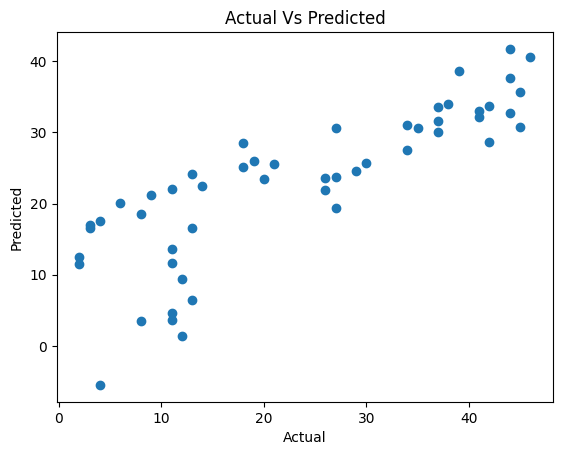

In [250]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.show()


# **Get Future Predictions**

In [251]:
x_new = servo.sample(1)


In [252]:
x_new


,Motor,Screw,Pgain,Vgain,Class
39,2,3,4,1,2


In [253]:
x_new.shape

(1, 5)

In [254]:
x_new = x_new.drop('Class',axis=1)


In [255]:
x_new


,Motor,Screw,Pgain,Vgain
39,2,3,4,1


In [256]:
x_new.shape


(1, 4)

In [257]:
y_pred_new = model.predict(x_new)


In [259]:
y_pred_new

array([12.46018697])